<a href="https://colab.research.google.com/github/thrcle/TensorflowMLBasic_ArrivalTimePrediction_SeoulToBusan/blob/main/3_2_2to5_(Multi)Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#3-2-2. 도착시간 예측 모델 만들기

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/fc/data/data_2020.csv")
data

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2
...,...,...,...,...,...,...
152865,20201231,3,101,130,8806,3
152866,20201231,5,101,130,8733,3
152867,20201231,6,101,110,3173,3
152868,20201231,13,101,110,3866,3


In [ ]:
# 서울:101, 기흥:105, 목천:110, 대전:115, 황간:120, 남구미:125, 동김천:130, 경주: 135, 부산:140
# 부산에서부터 떨어진 거리 -> 서울에서부터 떨어진 거리 = 0, 20, 77, 135, 185, 240, 215, 339, 407

#도착영업소코드 column을 거리로 변환
# ★ map() 활용 : 기존의 key에 대응되는 value로 변경

# answer : 
#data.rename(columns={'도착영업소코드':'거리'}, inplace=True)
data

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2
...,...,...,...,...,...,...
152865,20201231,3,101,130,8806,3
152866,20201231,5,101,130,8733,3
152867,20201231,6,101,110,3173,3
152868,20201231,13,101,110,3866,3


In [ ]:
# 서울:101, 기흥:105, 목천:110, 대전:115, 황간:120, 남구미:125, 동김천:130, 경주: 135, 부산:140
# 부산에서부터 떨어진 거리 -> 서울에서부터 떨어진 거리 = 0, 20, 77, 135, 185, 240, 215, 339, 407

#도착영업소코드 column을 거리로 변환
# ★ map() 활용 : 기존의 key에 대응되는 value로 변경

data['거리']=data['도착영업소코드'].map({105:20, 110:77, 115:135, 120:185, 125:240, 130:215, 135:339, 140:407})
#data.rename(columns={'도착영업소코드':'거리'}, inplace=True)
data

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일,거리
0,20200101,4,101,105,637,2,20
1,20200101,4,101,105,773,2,20
2,20200101,4,101,105,762,2,20
3,20200101,4,101,105,746,2,20
4,20200101,4,101,105,875,2,20
...,...,...,...,...,...,...,...
152865,20201231,3,101,130,8806,3,215
152866,20201231,5,101,130,8733,3,215
152867,20201231,6,101,110,3173,3,77
152868,20201231,13,101,110,3866,3,77


In [ ]:
# LinearRegression by Tensorflow

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
Selected_Date='2020-01-10' #@param {type:'date'}
input_date=int(Selected_Date.replace('-',''))
data_date=data[data['집계일자'] == input_date]
data_date 

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일,거리
3570,20200110,9,101,105,778,4,20
3571,20200110,9,101,105,862,4,20
3572,20200110,9,101,105,739,4,20
3573,20200110,9,101,105,852,4,20
3574,20200110,9,101,105,874,4,20
...,...,...,...,...,...,...,...
8440,20200110,2,101,115,7556,4,135
8442,20200110,6,101,115,6902,4,135
8447,20200110,7,101,130,8207,4,215
8448,20200110,3,101,115,4560,4,135


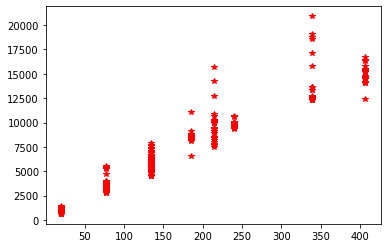

In [ ]:
# 특정집계일자의 거리별 통행시간 그래프 표현
plt.plot(data_date['거리'], data_date['통행시간'], 'r*')

단일항

In [ ]:
#집계일자와 거리별 평균통행시간
data_date.groupby(['집계일자','거리'])['통행시간'].mean()   #여러 x에 대응되는 y값이 여러개 있을 수 있으므로 y의 평균값(유일값)으로 

집계일자      거리 
20200110  20       880.007353
          77      3545.876190
          135     5816.191781
          185     8557.842105
          215     9592.600000
          240     9795.133333
          339    14371.681818
          407    15032.960000
Name: 통행시간, dtype: float64

In [ ]:
# reset_index() : groupby 후 1NF 형식으로 변환
data_date.groupby(['집계일자','거리'])['통행시간'].mean().reset_index()

,집계일자,거리,통행시간
0,20200110,20,880.007353
1,20200110,77,3545.876190
2,20200110,135,5816.191781
3,20200110,185,8557.842105
4,20200110,215,9592.600000
5,20200110,240,9795.133333
6,20200110,339,14371.681818
7,20200110,407,15032.960000


In [ ]:
data_date.groupby(['집계일자','거리'])['통행시간'].mean().reset_index().values

array([[2.02001100e+07, 2.00000000e+01, 8.80007353e+02],
       [2.02001100e+07, 7.70000000e+01, 3.54587619e+03],
       [2.02001100e+07, 1.35000000e+02, 5.81619178e+03],
       [2.02001100e+07, 1.85000000e+02, 8.55784211e+03],
       [2.02001100e+07, 2.15000000e+02, 9.59260000e+03],
       [2.02001100e+07, 2.40000000e+02, 9.79513333e+03],
       [2.02001100e+07, 3.39000000e+02, 1.43716818e+04],
       [2.02001100e+07, 4.07000000e+02, 1.50329600e+04]])

# 새 섹션

- 저장할 데이터의 개수가 정해져 있고 / 삽입, 삭제 작업이 적고 / 특정 위치의 데이터를 조회하는 작업이 많다면 배열

- 저장할 데이터의 개수가 미정이고 / 삽입, 삭제 작업이 많고 / 특정 위치 데이터를 조회하는 경우가 별로 없다면 리스트

In [ ]:
data_to_list = data_date.groupby(['집계일자','거리'])['통행시간'].mean().reset_index().values.tolist()

In [ ]:
# list형태로 바꾼 데이터를 train에 넣기

x_train = [int(r[1]) for r in data_to_list]   # x=거리
y_train = [int(r[2]/10) for r in data_to_list]   # y=평균통행시간. 10으로 나눠주면서 단위(scale)를 맞춰준다(normalization)


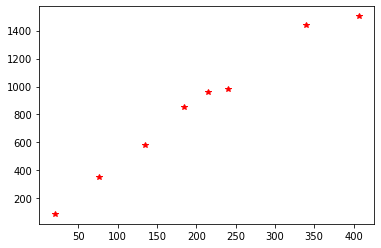

In [ ]:
plt.plot(x_train, y_train, 'r*')

In [ ]:
# 하이퍼 파라미터 튜닝
learning_rate = 1e-8  # 10^-8
learning_epochs = 2000 

In [ ]:
# 모델 생성
# Stochastic gradient descent (SGD) Optimizer
sgd=tf.keras.optimizers.SGD(learning_rate=learning_rate)
# Mean Square Error (MSE) loss function
mse=tf.keras.losses.mean_squared_error

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_dim=1))

model.compile(loss=mse, optimizer=sgd)

In [ ]:
# train the model
history=model.fit(x_train, y_train, epochs=learning_epochs)


Epoch 1/2000
1/1 [==============================] - 0s 254ms/step - loss: 1064278.2500
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 1061934.2500
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 1059595.5000
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 1057261.7500
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 1054933.2500
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 1052610.0000
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 1050291.7500
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 1047978.7500
Epoch 9/2000
1/1 [==============================] - 0s 13ms/step - loss: 1045670.8125
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 1043368.0625
Epoch 11/2000
1/1 [==============================] - 0s 11ms/step - loss: 1041070.2500
Epoch 12/2000
1/1 [==============================] - 0s 8m

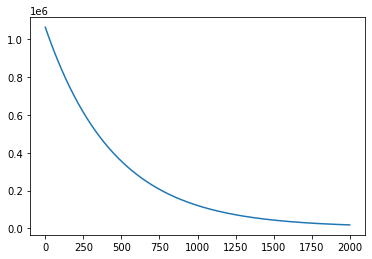

In [ ]:
plt.plot(history.history['loss'])
plt.show()

In [ ]:
# step에 따른 cost(= error=loss) 변화
print("%20s %20s"%('step','cost')+'\n')
for step in range(learning_epochs):
  if step%100==0:
    cost_val=history.history['loss'][step]
    print("%20i %20.5f"%(step,cost_val))

                step                 cost

                   0        1064278.25000
                 100         853809.50000
                 200         685193.37500
                 300         550107.25000
                 400         441883.68750
                 500         355181.03125
                 600         285719.43750
                 700         230070.53125
                 800         185487.75000
                 900         149770.37500
                1000         121155.54688
                1100          98231.10938
                1200          79865.12500
                1300          65151.32812
                1400          53363.37891
                1500          43919.60156
                1600          36353.82812
                1700          30292.39844
                1800          25436.41016
                1900          21546.10938


In [ ]:
x_train, y_train  #실제

# 407만큼 이동 시 1530초 걸림

([20, 77, 135, 185, 215, 240, 339, 407],
 [88, 354, 581, 855, 959, 979, 1437, 1503])

In [ ]:
Distance=407 #@param {type:"slider", min:0, max:500, step:1}
input_data=[Distance]
predicted_value=model.predict(input_data)
predicted_value

array([[1464.4733]], dtype=float32)

In [ ]:
print("%3d km takes %5.1f seconds on %s " %(Distance, predicted_value[0][0]*10, Selected_Date))

407 km takes 14644.7 seconds on 2020-01-10 


# Multi Variable


In [ ]:
data_destination=data[data['거리']==407]   #data:original data
data_destination.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일,거리
292,20200101,6,101,140,15824,2,407
293,20200101,6,101,140,19623,2,407
294,20200101,9,101,140,18048,2,407
295,20200101,17,101,140,17979,2,407
296,20200101,11,101,140,17349,2,407


In [ ]:
data_destination.groupby(['집계시','요일','거리'])['통행시간'].mean()  

집계시  요일  거리 
0    0   407    15549.675676
     1   407    15983.102564
     2   407    15129.750000
     3   407    14533.189189
     4   407    15908.275000
                    ...     
23   2   407    16006.125000
     3   407    16118.288889
     4   407    17035.450980
     5   407    16033.622222
     6   407    15297.022727
Name: 통행시간, Length: 168, dtype: float64

In [ ]:
data_out_mul=data_destination.groupby(['집계시','요일','거리'])['통행시간'].mean().unstack(level=-1)   #unstack: row를 column으로 피벗시킴
data_out_mul

거리               407
집계시 요일              
0   0   15549.675676
    1   15983.102564
    2   15129.750000
    3   14533.189189
    4   15908.275000
...              ...
23  2   16006.125000
    3   16118.288889
    4   17035.450980
    5   16033.622222
    6   15297.022727

[168 rows x 1 columns]

In [ ]:
data_out_mul.dropna()

거리               407
집계시 요일              
0   0   15549.675676
    1   15983.102564
    2   15129.750000
    3   14533.189189
    4   15908.275000
...              ...
23  2   16006.125000
    3   16118.288889
    4   17035.450980
    5   16033.622222
    6   15297.022727

[168 rows x 1 columns]

In [ ]:

data_out_mul.reset_index(inplace=True)
data_out_mul

거리,집계시,요일,407
0,0,0,15549.675676
1,0,1,15983.102564
2,0,2,15129.750000
3,0,3,14533.189189
4,0,4,15908.275000
...,...,...,...
163,23,2,16006.125000
164,23,3,16118.288889
165,23,4,17035.450980
166,23,5,16033.622222


In [ ]:
data_out_mul2=data_out_mul

In [ ]:
data_out_mul.values[:5]

array([[0.00000000e+00, 0.00000000e+00, 1.55496757e+04],
       [0.00000000e+00, 1.00000000e+00, 1.59831026e+04],
       [0.00000000e+00, 2.00000000e+00, 1.51297500e+04],
       [0.00000000e+00, 3.00000000e+00, 1.45331892e+04],
       [0.00000000e+00, 4.00000000e+00, 1.59082750e+04]])

In [ ]:
data_out_mul=data_out_mul.values.tolist()
data_out_mul[:5]

[[0.0, 0.0, 15549.675675675675],
 [0.0, 1.0, 15983.102564102564],
 [0.0, 2.0, 15129.75],
 [0.0, 3.0, 14533.18918918919],
 [0.0, 4.0, 15908.275]]

In [ ]:
# dataframe을 list형태로 : 텐서플로우에서 사용하기 위해

In [ ]:
data_out_mul[:5]

[[0.0, 0.0, 15549.675675675675],
 [0.0, 1.0, 15983.102564102564],
 [0.0, 2.0, 15129.75],
 [0.0, 3.0, 14533.18918918919],
 [0.0, 4.0, 15908.275]]

In [ ]:
# multi_machine learning
mx_train=[r[0:2] for r in data_out_mul]   #집계시, 요일
my_train=[[r[-1]] for r in data_out_mul]




In [ ]:
my_train[:5]

[[15549.675675675675],
 [15983.102564102564],
 [15129.75],
 [14533.18918918919],
 [15908.275]]

In [ ]:
# 모델 생성
# Stochastic gradient descent (SGD) Optimizer
sgd=tf.keras.optimizers.SGD(learning_rate=learning_rate)
# Mean Square Error (MSE) loss function
mse=tf.keras.losses.mean_squared_error

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(2,)))

model.compile(loss=mse, optimizer=sgd)

In [ ]:
history=model.fit(mx_train, my_train, epochs=learning_epochs, verbose=False)

KeyboardInterrupt: ignored

In [ ]:
time=14 #@param{type:'slider',min:0, max:23, step:1}
day=3 #@param{type:'slider', min:0, max:6, step:1}


In [ ]:
time

14

In [ ]:
data_out_mul[:5]

[[0.0, 0.0, 15549.675675675675],
 [0.0, 1.0, 15983.102564102564],
 [0.0, 2.0, 15129.75],
 [0.0, 3.0, 14533.18918918919],
 [0.0, 4.0, 15908.275]]

In [ ]:
time_condition=data_out_mul2['집계시']==time   # data_out_mul2는 column이 적힌 df임. 변수에 저장해가면서 df를 핸들링해야 나중에 쓰기 편함 ((반성))
day_condition=data_out_mul2['요일']==day 

data_out_mul2[time_condition&day_condition]

거리,집계시,요일,407
101,14,3,15936.189655


In [ ]:
input=[[time, day]]   # array로 들어가서 다시 선언해줌 ()          # 변수명은 확실하게 구분해서 만들기 

predeict_time = model.predict(input)

ml_time=predeict_time[0][0]  #array에 있는 값만 꺼내기
week_days=['월','화','수','목','금','토','일']

print("%10s %10s %50s" % ('집계시','요일','서울에서 부산까지 통행시간')+'\n')
print("%10i %10s %50f" % (time,week_days[day],ml_time) +'\n')

       집계시         요일                                     서울에서 부산까지 통행시간

        14          목                                         655.923401

